# **EDA - 1**

In [ ]:
#1. What is the range of selling prices in the dataset.
import pandas as pd
df = pd.read_csv('BIKE DETAILS.csv')
range_price = df['selling_price'].max() - df['selling_price'].min()
range_price

755000

In [ ]:
#2. What is the median selling price for bikes in the dataset.
sorted_prices = df['selling_price'].sort_values().values

n = len(sorted_prices)

if n % 2 == 1:

    median_price = sorted_prices[n // 2]


In [ ]:
median_price

np.int64(45000)

In [ ]:
#3. What is the most common seller type?
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


In [ ]:
#4. How many bikes have driven more than 50,000 kilometers?
(df['km_driven'] > 50000).sum()


np.int64(170)

In [ ]:
#5. What is the average km_driven value for each ownership type?
df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [ ]:
#6. What proportion of bikes are from the year 2015 or older?
(df['year'] >= 2015).mean()

np.float64(0.527803958529689)

In [ ]:
#7. What is the trend of missing values across the dataset?
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
#8. What is the highest ex_showroom_price recorded, and for which bike?
df.loc[df['ex_showroom_price'].idxmax()]

,134
name,Harley-Davidson Street Bob
selling_price,750000
year,2013
seller_type,Individual
owner,2nd owner
km_driven,12000
ex_showroom_price,1278000.0


In [ ]:
#9. What is the total number of bikes listed by each seller type?
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


In [ ]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?
df.loc[df['owner'] == 'First Owner', ['selling_price', 'km_driven']].corr()

,selling_price,km_driven
selling_price,NaN,NaN
km_driven,NaN,NaN


In [ ]:
#11. Identify and remove outliers in the km_driven column using the IQR method?
q1 = df['km_driven'].quantile(0.25)
q3 = df['km_driven'].quantile(0.75)
iqr = q3 - q1
iqr

np.float64(29500.0)

In [ ]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price.
df.groupby('year')['selling_price'].mean()

,selling_price
year,
1988,20000.000000
1991,6000.000000
1993,130000.000000
1995,150000.000000
1997,17500.000000
1998,28333.333333
1999,15000.000000
2000,20833.333333
2001,40000.000000


In [ ]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
df['depreciation'] = df['selling_price'] - df['ex_showroom_price']
df['depreciation'].mean()

np.float64(-28513.549520766774)

In [ ]:
#14. Which bike names are priced significantly above the average price for their manufacturing year?
df['year']

,year
0,2019
1,2017
2,2018
3,2015
4,2011
...,...
1056,2010
1057,2012
1058,2013
1059,2009


In [ ]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
df.corr()

ValueError: could not convert string to float: 'Royal Enfield Classic 350'

# EDA - 2

In [20]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
df = pd.read_csv('Car Sale.csv')
df.groupby('Dealer_Name')['Price ($)'].mean()

,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27669.456091
C & M Motors Inc,28393.724138
Capitol KIA,27719.830946
Chrysler Plymouth,27909.411765
Chrysler of Tri-Cities,28820.379822
Classic Chevy,27940.105413
Clay Johnson Auto Sales,27596.997041
Diehl Motor CO Inc,27775.500000
Enterprise Rent A Car,27882.040462


In [21]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
df.groupby('Company')['Price ($)'].std().sort_values()

,Price ($)
Company,
Hyundai,3573.264781
Porsche,5237.573591
Acura,8121.293738
Jeep,9850.871348
Jaguar,10299.473202
Dodge,11269.806312
Honda,11310.255093
Chrysler,11608.925979
Mitsubishi,11729.552799


In [22]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
df.groupby('Transmission')['Price ($)'].describe()


,count,mean,std,min,25%,50%,75%,max
Transmission,,,,,,,,
Auto,6920.0,28265.712139,13761.161512,9000.0,19000.0,24000.0,35000.0,75700.0
Manual,6168.0,27863.964332,15887.418184,10000.0,17000.0,22001.0,34000.0,85800.0


In [25]:
#4. What is the distribution of car prices across different regions?
df.groupby('Dealer_Region')['Price ($)'].describe()

,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,1737.0,28164.561313,15043.979346,9000.0,18001.0,22501.0,34500.00,85800.0
Austin,2238.0,28323.760054,14811.003879,9000.0,18275.0,23000.0,35000.75,85001.0
Greenville,1713.0,28048.761821,15016.679732,9000.0,18000.0,22500.0,34000.00,85200.0
Janesville,2105.0,27855.076010,14345.460842,9000.0,18001.0,23000.0,34000.00,85301.0
Middletown,1732.0,28136.979792,15082.490692,9000.0,18000.0,22700.0,34000.00,85300.0
Pasco,1696.0,28255.606722,14721.892914,9000.0,18500.0,24000.0,34001.00,85600.0
Scottsdale,1867.0,27753.626138,14697.429503,9000.0,18000.0,23000.0,33000.00,85001.0


In [26]:
#5. What is the distribution of cars based on body styles?
df.groupby('Body Style')['Price ($)'].describe()

,count,mean,std,min,25%,50%,75%,max
Body Style,,,,,,,,
Hardtop,1497.0,29240.920508,14384.066519,11000.0,19500.0,24000.0,39000.0,82500.0
Hatchback,3678.0,27393.917618,14668.955354,9000.0,18000.0,22001.0,32000.0,85600.0
Passenger,2153.0,28685.046447,16233.923345,9000.0,17500.0,22500.0,36500.0,85800.0
SUV,3299.0,26607.681419,13975.078291,9000.0,18000.0,22001.0,31000.0,85500.0
Sedan,2461.0,29824.269403,14764.125366,11000.0,19000.0,25000.0,39001.0,69980.0


In [27]:
#6. How does the average selling price of cars vary by customer gender and annual income?
df.groupby('Gender')['Price ($)'].mean()

,Price ($)
Gender,
Female,28352.653918
Male,28004.806445


In [28]:
#7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?
df.groupby('Dealer_Region')['Price ($)'].describe()


,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,1737.0,28164.561313,15043.979346,9000.0,18001.0,22501.0,34500.00,85800.0
Austin,2238.0,28323.760054,14811.003879,9000.0,18275.0,23000.0,35000.75,85001.0
Greenville,1713.0,28048.761821,15016.679732,9000.0,18000.0,22500.0,34000.00,85200.0
Janesville,2105.0,27855.076010,14345.460842,9000.0,18001.0,23000.0,34000.00,85301.0
Middletown,1732.0,28136.979792,15082.490692,9000.0,18000.0,22700.0,34000.00,85300.0
Pasco,1696.0,28255.606722,14721.892914,9000.0,18500.0,24000.0,34001.00,85600.0
Scottsdale,1867.0,27753.626138,14697.429503,9000.0,18000.0,23000.0,33000.00,85001.0


In [30]:
#8. How does the average car price differ between cars with different engine sizes?
df.groupby('Engine')['Price ($)'].mean()

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28265.712139
Overhead Camshaft,27863.964332


In [41]:
#9. How do car prices vary based on the customer’s annual income bracket?
df.groupby('Annual Income')['Price ($)'].mean()

,Price ($)
Annual Income,
13500,27656.42206
85000,43000.00000
121000,20000.00000
131000,17000.00000
145000,14000.00000
...,...
6400000,71000.00000
6460000,14000.00000
6500000,25000.00000


In [33]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
df.groupby('Model')['Price ($)'].describe()

,count,mean,std,min,25%,50%,75%,max
Model,,,,,,,,
3-Sep,96.0,35991.135417,20514.299397,18000.0,23000.0,26000.0,69000.0,69980.0
3000GT,160.0,22201.775000,6333.716720,12000.0,19000.0,20000.0,24000.0,39500.0
300M,133.0,21439.616541,4257.849773,16000.0,16001.0,22000.0,26000.0,26700.0
323i,145.0,17339.158621,4759.006363,9000.0,15000.0,19000.0,21000.0,22500.0
328i,114.0,26469.500000,17810.505594,16000.0,16200.0,18001.0,21001.0,69500.0
...,...,...,...,...,...,...,...,...
Viper,129.0,30888.573643,6904.568451,23000.0,25500.0,31000.0,41000.0,41501.0
Voyager,95.0,31865.357895,23261.794035,12000.0,20000.0,20001.0,22250.5,75500.0
Windstar,70.0,23887.957143,6374.918419,17000.0,19000.0,19050.5,31000.0,31750.0


In [34]:
#11.  How does car price vary with engine size across different car colors, and which colors have the highest price variation?
df.groupby('Color')['Price ($)'].describe()

,count,mean,std,min,25%,50%,75%,max
Color,,,,,,,,
Black,4311.0,28508.385525,15302.781486,9000.0,18000.0,24000.0,36000.0,85800.0
Pale White,5732.0,27344.106420,13846.899782,10000.0,17700.0,22001.0,33000.0,82750.0
Red,3045.0,28843.215764,15734.127017,11000.0,19000.0,23700.0,34000.0,82600.0


In [35]:
#12. Is there any seasonal trend in car sales based on the date of sale?
df.groupby('Date')['Price ($)'].describe()

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
1/10/2022,5.0,21100.200000,7478.549338,12500.0,15500.00,20000.0,28501.00,29000.0
1/10/2023,15.0,27506.733333,16064.753613,9500.0,17500.00,22000.0,37500.00,60000.0
1/11/2023,20.0,26375.000000,13631.305880,12000.0,18000.00,23750.0,29500.00,69000.0
1/12/2022,30.0,29146.733333,15979.943336,11000.0,19000.00,23500.5,36250.00,71000.0
1/13/2022,20.0,27677.500000,17524.167335,11650.0,16000.00,21000.0,36000.00,82000.0
...,...,...,...,...,...,...,...,...
9/4/2022,35.0,28337.342857,14327.565985,9000.0,20000.50,24001.0,35550.00,71001.0
9/5/2022,45.0,30200.177778,15843.812103,12000.0,19001.00,26000.0,36001.00,75000.0
9/6/2022,50.0,29613.840000,16455.802273,9000.0,19250.00,24500.0,36375.00,75000.0


In [36]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type?
df.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()

count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto           702.0  31578.756410  13834.994949  12000.0  21001.0   
           Manual         795.0  27176.567296  14551.367452  11000.0  17626.0   
Hatchback  Auto          2064.0  26529.829457  13485.481003   9000.0  18001.0   
           Manual        1614.0  28498.922553  15992.193020  11000.0  17000.0   
Passenger  Auto          1125.0  28606.571556  13872.093339   9000.0  19000.0   
           Manual        1028.0  28770.926070  18482.530364  10000.0  16000.0   
SUV        Auto          1600.0  27314.460625  13133.844830   9000.0  19000.0   
           Manual        1699.0  25942.085933  14696.229626  10000.0  17000.0   
Sedan      Auto          1429.0  29942.157453  14232.408163  12000.0  19000.0   
           Manual        1032.0  29661.031008  15475.778772  11000.0  19000.0   

                             50%       75%      max  
Body Style Transmission                              
Hardtop    Auto          27000.0  42001.00  75501.0  
           Manual        22001.0  29000.00  82500.0  
Hatchback  Auto          22000.0  31000.00  75700.0  
           Manual        22500.0  36000.75  85600.0  
Passenger  Auto          25000.0  36001.00  69800.0  
           Manual        21051.0  37000.00  85800.0  
SUV        Auto          25000.0  32125.75  75501.0  
           Manual        22000.0  28000.00  85500.0  
Sedan      Auto          26000.0  39001.00  69980.0  
           Manual        25000.0  41000.00  69501.0

In [51]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
df['Engine'] = df['Engine'].str.extract(r'C_CND_000001 from C_CND_023906').astype(float)
correlation_matrix = df[['Price ($)', 'Engine', 'Annual Income']].corr()
correlation_matrix

AttributeError: Can only use .str accessor with string values!

In [38]:
#15. How does the average car price vary across different car models and engine types?
df.groupby(['Model', 'Engine'])['Price ($)'].mean()

Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    35991.135417
3000GT    DoubleÂ Overhead Camshaft    22563.741176
          Overhead Camshaft            21791.546667
300M      DoubleÂ Overhead Camshaft    21439.616541
323i      DoubleÂ Overhead Camshaft    16780.746032
                                           ...     
Windstar  Overhead Camshaft            17131.000000
Wrangler  DoubleÂ Overhead Camshaft    21841.654545
          Overhead Camshaft            18584.368421
Xterra    DoubleÂ Overhead Camshaft    15474.133333
          Overhead Camshaft            31066.916667
Name: Price ($), Length: 261, dtype: float64

#  EDA - 3

In [74]:
#1. What is the average rating for each product category?
df = pd.read_csv('amazon.csv')
df.groupby('category')['rating'].min()

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.8
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.3
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.0
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.2
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.1
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.3


In [68]:
#2. What are the top rating_count products by category?
df.groupby('category')['rating_count'].max()

,rating_count
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,1118.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4426.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,7222.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,14969.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,7352.0
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",5792.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",6199.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",5719.0


In [75]:
#3.  What is the distribution of discounted prices vs. actual prices?
df.groupby('discounted_price')['actual_price'].describe()

,count,unique,top,freq
discounted_price,,,,
"₹1,043",1,1,"₹1,345",1
"₹1,049",5,4,"₹2,499",2
"₹1,052",1,1,"₹1,790",1
"₹1,055",1,1,"₹1,249",1
"₹1,059",1,1,"₹3,999",1
...,...,...,...,...
₹980,1,1,₹980,1
₹99,15,6,₹999,5
₹998,1,1,"₹2,999",1


In [77]:
#4. How does the average discount percentage vary across categories?
df.groupby('category')['discount_percentage'].min()

,discount_percentage
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,42%
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,63%
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,35%
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,53%
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,43%
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",0%
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",0%
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",15%


In [78]:
#5. What are the most popular product names?
df.groupby('product_name')['rating'].describe()

,count,unique,top,freq
product_name,,,,
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,1,1,4.5,1
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!,1,1,3.4,1
"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor",1,1,4.1,1
"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox",1,1,4.6,1
"3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing",1,1,4.4,1
...,...,...,...,...
"realme Buds Wireless in Ear Bluetooth Earphones with mic, 11.2mm Bass Boost Driver, Magnetic Fast Pair, Fast Charging and 12 Hrs Playtime (Yellow)",1,1,4.1,1
"realme narzo 50 (Speed Blue, 4GB RAM+64GB Storage) Helio G96 Processor | 50MP AI Triple Camera | 120Hz Ultra Smooth Display",1,1,4.2,1
"realme narzo 50i (Mint Green, 2GB RAM+32GB Storage) Octa Core Processor | 6.5"" inch Large Display",1,1,4.0,1


In [81]:
#6. What are the most popular product keywords?
df.groupby('product_link')['rating'].describe()

,count,unique,top,freq
product_link,,,,
https://www.amazon.in/1-8Litre-Electric-Kettle-Stainless-16088/dp/B094G9L9LT/ref=sr_1_179?qid=1672923600&s=kitchen&sr=1-179,1,1,3.8,1
https://www.amazon.in/10000mAH-Li-Polymer-Power-Charging-Midnight/dp/B08HVL8QN3/ref=sr_1_25?qid=1672895755&s=electronics&sr=1-25,1,1,4.3,1
https://www.amazon.in/10W-Charger-Cable-Meter-Black/dp/B085CZ3SR1/ref=sr_1_164?qid=1672895791&s=electronics&sr=1-164,1,1,4.2,1
https://www.amazon.in/10WERUN-Bluetooth-Smartwatch-Wireless-Fitness/dp/B09RFB2SJQ/ref=sr_1_367?qid=1672895857&s=electronics&sr=1-367,1,1,4.1,1
https://www.amazon.in/138-8-inches-Ultra-Android-L55M6-ES/dp/B09RWQ7YR6/ref=sr_1_499?qid=1672909149&s=electronics&sr=1-499,1,1,4.3,1
...,...,...,...,...
https://www.amazon.in/realme-Classic-Wired-Earphones-Microphone/dp/B08G28Z33M/ref=sr_1_58?qid=1672895762&s=electronics&sr=1-58,1,1,4.0,1
https://www.amazon.in/realme-RMA108-Realme-Buds-Wireless/dp/B07XJWTYM2/ref=sr_1_387?qid=1672903014&s=computers&sr=1-387,1,1,4.1,1
https://www.amazon.in/realme-Storage-Processor-Triple-Display/dp/B09RMQYHLH/ref=sr_1_52?qid=1672895762&s=electronics&sr=1-52,1,1,4.2,1


In [83]:
#7. What are the most popular product reviews?
df.groupby('review_id')['rating'].describe()

,count,unique,top,freq
review_id,,,,
"R10365HEDURWI9,R5RP542IMC4OI,RX2HFWXTTQDTS,R2636VYPMOZV9,RW2Z2YM3K8UV5,RVNGA0FEAXYHI,R2K7MABWMAQE26,R33YS4PO3JWU23",3,1,4.2,3
"R10758I9J937X1,R2QT07V4QXKIFY,R2BLT775YXVSXH,R3V1U8IIB8FFO2,RVBV8BEJ26OG6,R1LXTDC37JH60V,R1ICRMTTWYOFPK,R1HTJYYR59HC3S",1,1,4.4,1
"R10FUJSCR3VYHY,R2Y8B5LQ5HLACQ,R3BC8GS9GGMBTI,R2BO0XUUDY4ZA3,RN23FCU4EP3F3,RDGNXFM923PG4,R26PGAI8JKY8XB,R381CGOL80J2QM",2,1,4.2,2
"R10G3GXLZIE38O,R806LMS8MHN8Y,R10XDKD7Z4R4WL,R1WTLGHP5CFLH,R1JU8Q6B3XA8CB,R3VN34M1FH4YAZ,R11NPIORD8W3HB,RHOJTWXKPNHNT",1,1,4.2,1
"R10I6UIAQIP9TN,R2XEWWLV1LH7KX,R3J0MEY15WI71Z,R3HJ0GBBBUGEJZ,R3TGTIJ54KHOL0,R21TUQZLYNGC0M,R1JSFOA0TD4S1A,R1KOD8YMT3FJ7I",2,1,4.1,2
...,...,...,...,...
"RZN676INI7CXB,R3R7UHOVSK5HK6,RK4TT1MUA9PPK,R3SW1UZKGBAI70,R1QKN9JPJ1FWMZ,R208QSDKUOWNF6,R2426HG2VA66ZC,R1433K3KOBJMRY",1,1,4.2,1
"RZO6XGE3P1DX,R3RCHNNZ1GVHBL,R32VH8C2WKSPBO,RHPUY1L6EN7BY,RIVPXD585WKHV,RJBJT7A32QWPV,R1E92T2MFYX7MK,R2K5O9IMJOXBEX",1,1,4.3,1
"RZU7M4VT3VR9I,R34QGD0WN73BME,R3GPSO444Z45JY,R8V5HHELYQBN5,R1G5OOXJUH8OOQ,R1PJIEUCR1A06F,R2401CXS8NQ487,R2S7S3AL8MC5ZU",1,1,4.2,1


In [86]:
#8.  What is the correlation between discounted_price and rating?
df['discounted_price'] = df['discounted_price'].replace('[^\d.]', '', regex=True).astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df_clean = df[['discounted_price', 'rating']].dropna()

x = df_clean['discounted_price']
y = df_clean['rating']

mean_x = x.mean()
mean_y = y.mean()

numerator = ((x - mean_x) * (y - mean_y)).sum()
denominator = ((x - mean_x)**2).sum()**0.5 * ((y - mean_y)**2).sum()**0.5

correlation = numerator / denominator
print("Correlation:", correlation)


Correlation: 0.12033741712288534


In [87]:
#9. What are the Top 5 categories based on the highest rating?
df.groupby('category')['rating'].max().sort_values(ascending=False).head(5)

,rating
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,5.0
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",5.0
"Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters",4.8
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,4.8
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|DeepFatFryers|AirFryers,4.8


In [88]:
#10. Identify any potential areas for improvement or optimization based on the data analysis.

df['discounted_price'] = df['discounted_price'].replace('[^\d.]', '', regex=True).astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].replace(',', '', regex=True).astype(float)

missing_values = df.isnull().sum()
desc_stats = df[['discounted_price', 'rating', 'rating_count']].describe()

category_counts = df['category'].value_counts()

correlation = df[['discounted_price', 'rating']].corr().iloc[0, 1]

low_rated_products = df[df['rating'] < 3][['product_name', 'rating', 'category']]

high_reviewed = df[df['rating_count'] > 1000]
low_reviewed = df[df['rating_count'] < 10]

print("Missing Values:\n", missing_values)
print("\nSummary Stats:\n", desc_stats)
print("\nTop Categories:\n", category_counts.head())
print("\nCorrelation between price and rating:", correlation)
print("\nLow Rated Products:\n", low_rated_products.head())
print(f"\nHigh-Reviewed Products: {len(high_reviewed)}")
print(f"Low-Reviewed Products: {len(low_reviewed)}")

Missing Values:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Summary Stats:
        discounted_price       rating   rating_count
count       1465.000000  1464.000000    1463.000000
mean        3125.310874     4.096585   18295.541353
std         6944.304394     0.291674   42753.864952
min           39.000000     2.000000       2.000000
25%          325.000000     4.000000    1186.000000
50%          799.000000     4.100000    5179.000000
75%         1999.000000     4.300000   17336.500000
max        77990.000000     5.000000  426973.000000

Top Categories:
 category
Computers&Accessories|Accessories&Peripherals|Cables&Acces

# EDA - 4


In [89]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.
df = pd.read_csv('amazon.csv')
df.isnull().sum()


,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


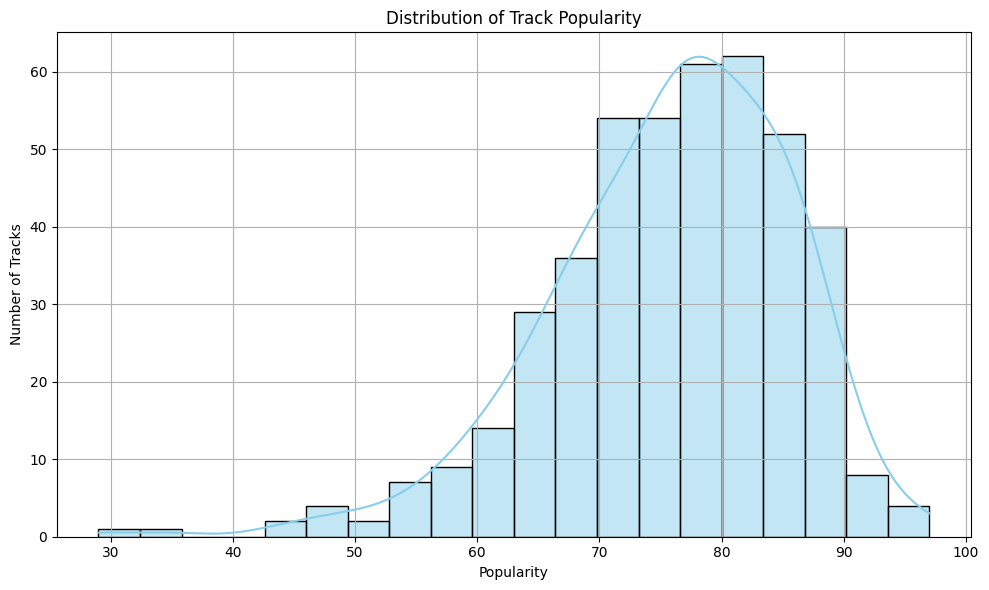

In [93]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

spotify_df = pd.read_csv("spotify.csv")
plt.figure(figsize=(10, 6))
sns.histplot(spotify_df['Popularity'], bins=20, kde=True, color='skyblue')

plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.tight_layout()
plt.show()


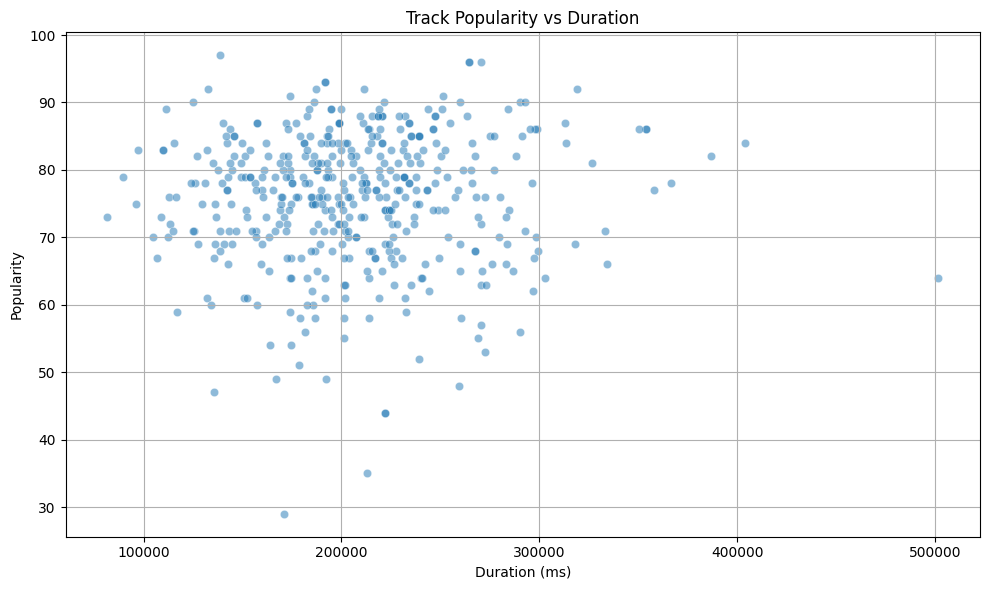

In [97]:
#3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
spotify_df['Popularity'] = pd.to_numeric(spotify_df['Popularity'], errors='coerce')
spotify_df['Duration (ms)'] = pd.to_numeric(spotify_df['Duration (ms)'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_df, x='Duration (ms)', y='Popularity', alpha=0.5)

plt.title('Track Popularity vs Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='Artist', ylabel='count'>

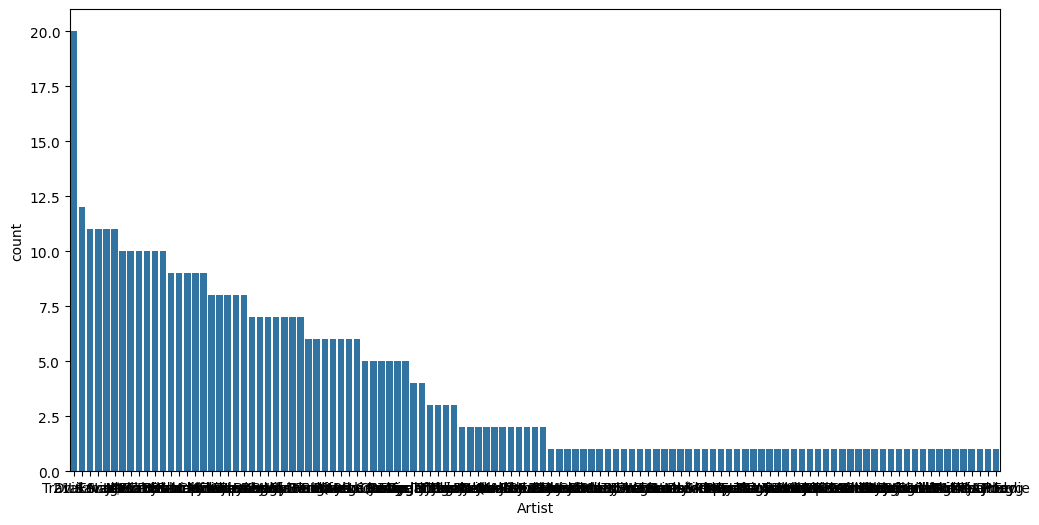

In [98]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
plt.figure(figsize=(12, 6))
sns.countplot(data=spotify_df, x='Artist', order=spotify_df['Artist'].value_counts().index)

In [99]:
#5.  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
least_popular_tracks = spotify_df.nsmallest(5, 'Popularity')
least_popular_tracks[['Artist', 'Track Name', 'Popularity']]

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
435,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47


In [100]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
top_artists = spotify_df.nlargest(5, 'Popularity')['Artist'].unique()
average_popularity = spotify_df[spotify_df['Artist'].isin(top_artists)].groupby('Artist')['Popularity'].mean()
average_popularity

,Popularity
Artist,
21 Savage,84.181818
Jack Harlow,77.714286
Travis Scott,87.000000
¥$,86.090909


In [101]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
top_artists = spotify_df.nlargest(5, 'Popularity')['Artist'].unique()
most_popular_tracks = spotify_df[spotify_df['Artist'].isin(top_artists)].groupby('Artist')['Track Name'].apply(list)
most_popular_tracks

,Track Name
Artist,
21 Savage,"[née-nah, redrum, née-nah, n.h.i.e., Glock In ..."
Jack Harlow,"[Lovin On Me, First Class, Tyler Herro, WHATS ..."
Travis Scott,"[MELTDOWN (feat. Drake), FE!N (feat. Playboi C..."
¥$,"[CARNIVAL, BURN, FUK SUMN, BACK TO ME, STARS, ..."


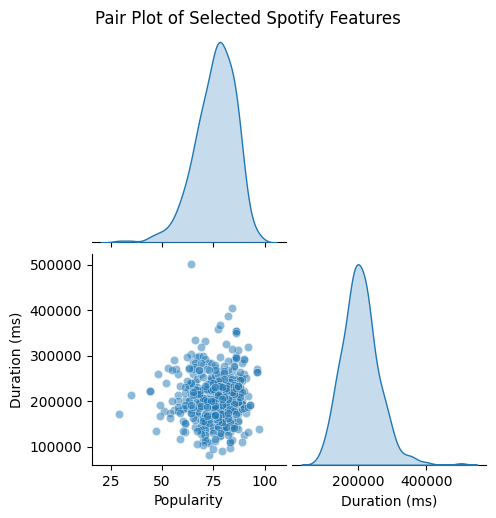

In [105]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.
num_cols = ['Popularity', 'Duration (ms)']

spotify_subset = spotify_df[num_cols].dropna()

sns.pairplot(spotify_subset, corner=True, diag_kind='kde', plot_kws={'alpha': 0.5})

plt.suptitle('Pair Plot of Selected Spotify Features', y=1.02)
plt.show()

<ipython-input-110-f5dea3f78d5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='Artist', y='Duration (ms)', palette='Set2')


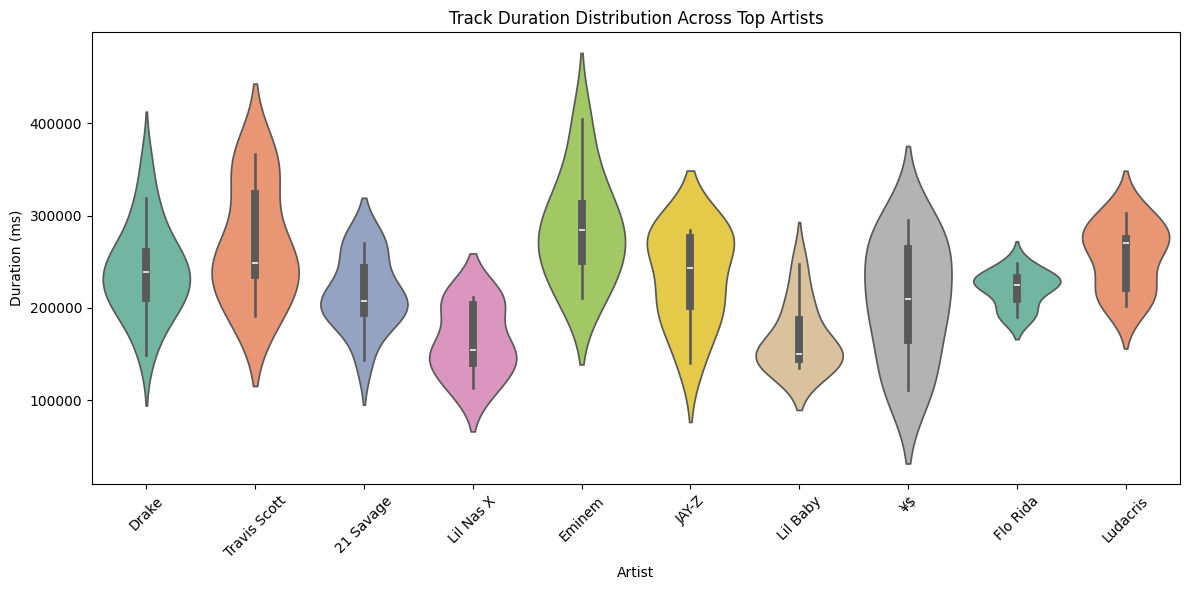

In [110]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
spotify_df['Duration (ms)'] = pd.to_numeric(spotify_df['Duration (ms)'], errors='coerce')
spotify_df = spotify_df.dropna(subset=['Duration (ms)', 'Artist'])

top_artists = spotify_df['Artist'].value_counts().head(10).index
filtered_df = spotify_df[spotify_df['Artist'].isin(top_artists)]

plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df, x='Artist', y='Duration (ms)', palette='Set2')

plt.title('Track Duration Distribution Across Top Artists')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-113-c33c0898aed2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='Artist', y='Popularity', palette='Set3', inner='quartile')


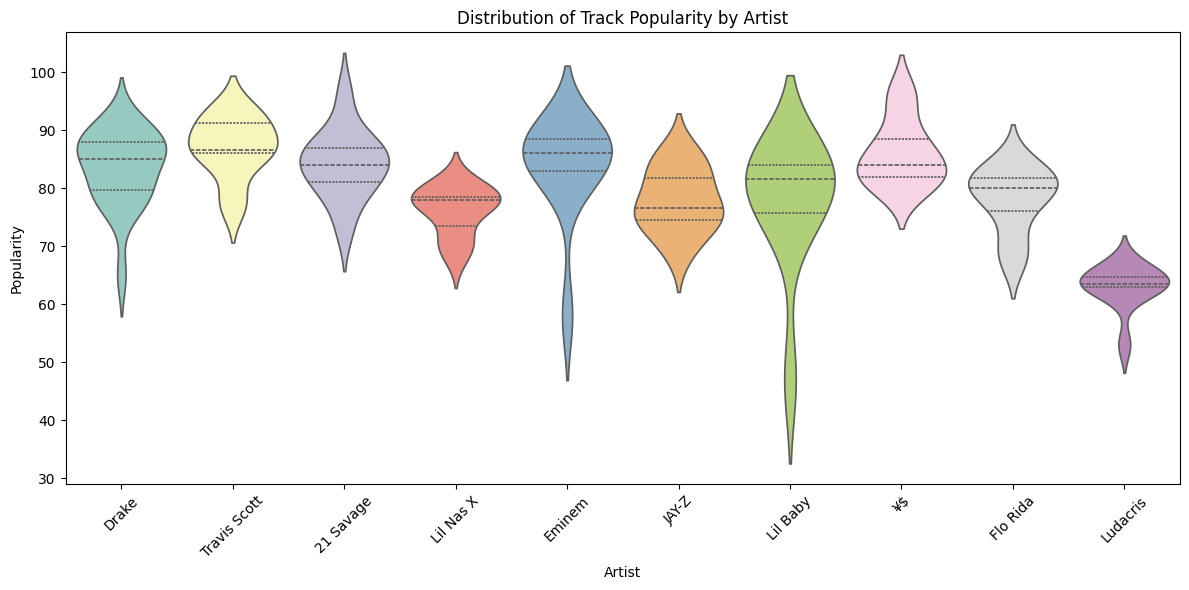

In [113]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
spotify_df['Popularity'] = pd.to_numeric(spotify_df['Popularity'], errors='coerce')
spotify_df = spotify_df.dropna(subset=['Popularity', 'Artist'])

top_artists = spotify_df['Artist'].value_counts().head(10).index
filtered_df = spotify_df[spotify_df['Artist'].isin(top_artists)]

plt.figure(figsize=(12, 6))

sns.violinplot(data=filtered_df, x='Artist', y='Popularity', palette='Set3', inner='quartile')

plt.title('Distribution of Track Popularity by Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()